# Drones
### Exponential Tails of the Normal Distribution
| Range | Expected Fraction of Population Inside Range | Approximate Expected Frequency Outside Range | Approximate frequency for daily event |
| ----- | -------------------------------------------- | -------------------------------------------- | -------------------------------------------- |
| μ ± 0.5σ | 0.382924922548026                            | 2 in 3 |Four or five times a week|
| μ ± σ | 0.682689492137086 | 1 in 3 |Twice a week|
| μ ± 1.5σ | 0.866385597462284 | 1 in 7 |Weekly|
| μ ± 2σ | 0.954499736103642 | 1 in 22 |Every three weeks|
| μ ± 2.5σ | 0.987580669348448 | 1 in 81 |Quarterly|
| μ ± 3σ | 0.997300203936740 | 1 in 370 |Yearly|
| μ ± 3.5σ | 0.999534741841929 | 1 in 2149 |Every 6 years|
| μ ± 4σ | 0.999936657516334 | 1 in 15,787 |Every 43 years|
| μ ± 4.5σ | 0.999993204653751 | 1 in 147,160 |Every 403 years|
| μ ± 5σ | 0.999999426696856 | 1 in 744,278 |Every 4776 years|
| μ ± 5.5σ | 0.999999962020875 | 1 in 26,330,254 |Every 72,090 years|
| μ ± 6σ | 0.999999998026825 | 1 in 506,797,346 |Every 1.38 million years|

# Anomaly Detection Overview:

Exercise

Take a few minutes and jot down some example applications, specific problems, or domains where detecting anomalies is super valuable and impactful.
- In commodities trading, detecting outliers can be beneficial for preventing losses from a portfolio. e.g. detecting an anomolous price drop can trigger a sell order to hopefully minimize losses.
- In the medical community, early detection if often linked to better results when treating certain illnesses.


Identify a few example applications, specific problems, or domains where the outliers can skew the data in a negative way and those outliers may be safely avoided for producing a model.
- In commodities trading, prices can be volatile due to the nature of the human spirit. Abnormal purchases from uncommon players in a certain market may affect the price significantly and still be dismissable due to the unreliable frequency of such events.
- Shoe manufacturer's probably ignore outliers in shoe sizes. Perhaps outliers need custom shoes.

# Continuous Variable Probabilistic Methods for Identifying Outliers
# Imports

In [1]:
# current filepath system leaves plenty to be desired
import sys
local_path = '/Users/hinzlehome/codeup-data-science/binance-project/'
sys.path.insert(0, local_path)

# imports.py in /utils/
from utils.imports import *

# plotting magic
%matplotlib inline
# plotting defaults
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=16)
# plt.style.available
# ^^^ show available seaborn styles

# !!! Warning !!! 
# *** no more warnings ***
# import warnings
# warnings.filterwarnings("ignore")

# custom mods
from utils.tidy import *
from utils.model import *


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Exercises

1. Using lemonade.csv dataset and focusing on continuous variables:

 - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
 - Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
 - Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
 - Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?
2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
 - Use a 2 sigma decision rule to isolate the outliers.
	- Do these make sense?
	- Should certain outliers be kept or removed?
3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [2]:
url='/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/csv/lemonade.csv'
df = pd.read_csv(url)

In [4]:
df.Date = pd.to_datetime(df.Date)


In [5]:
df = df.set_index('Date')


In [6]:
# pull out month as well for the sake of aggregative measures and trends
df['Month'] = df.index.month_name()


In [7]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


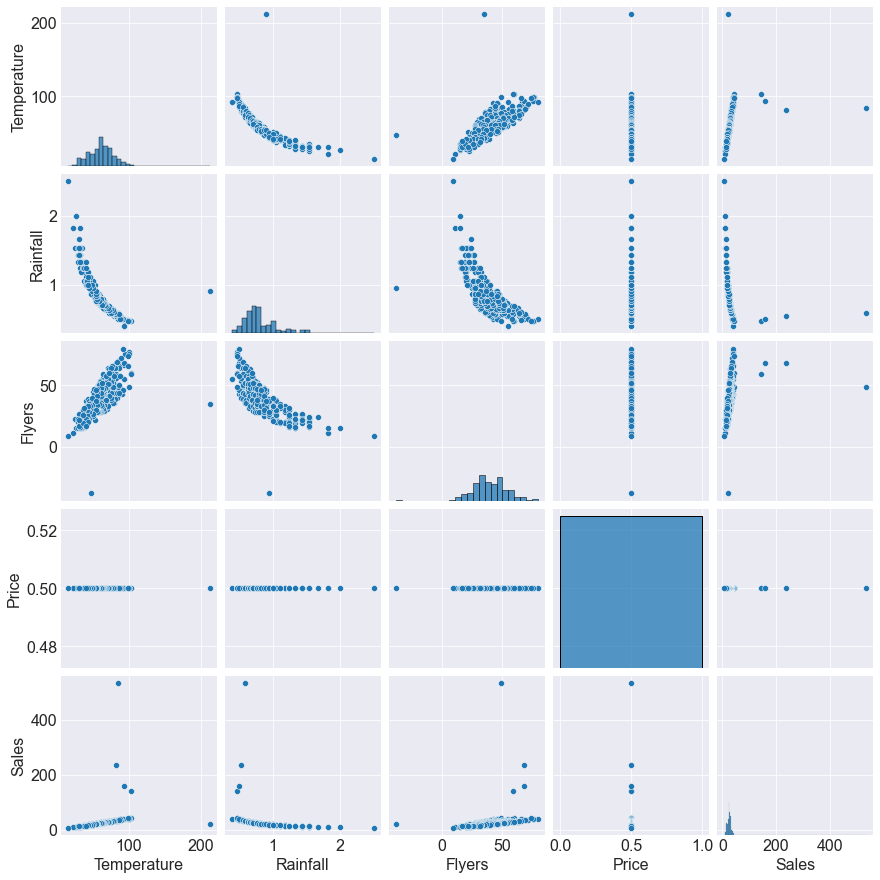

In [8]:
sns.pairplot(df)


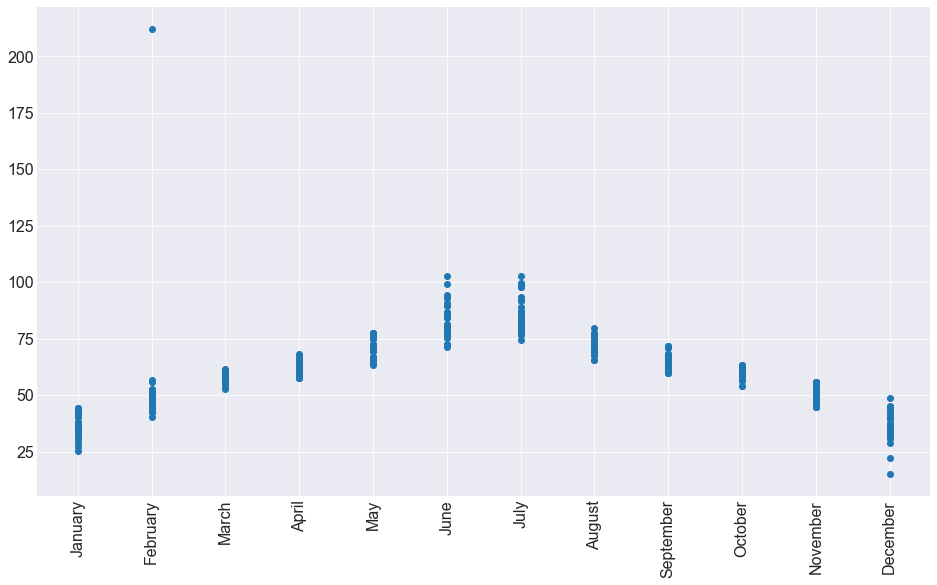

In [9]:
plt.scatter(df.Month, df.Temperature)
plt.xticks(rotation=90)
plt.show()

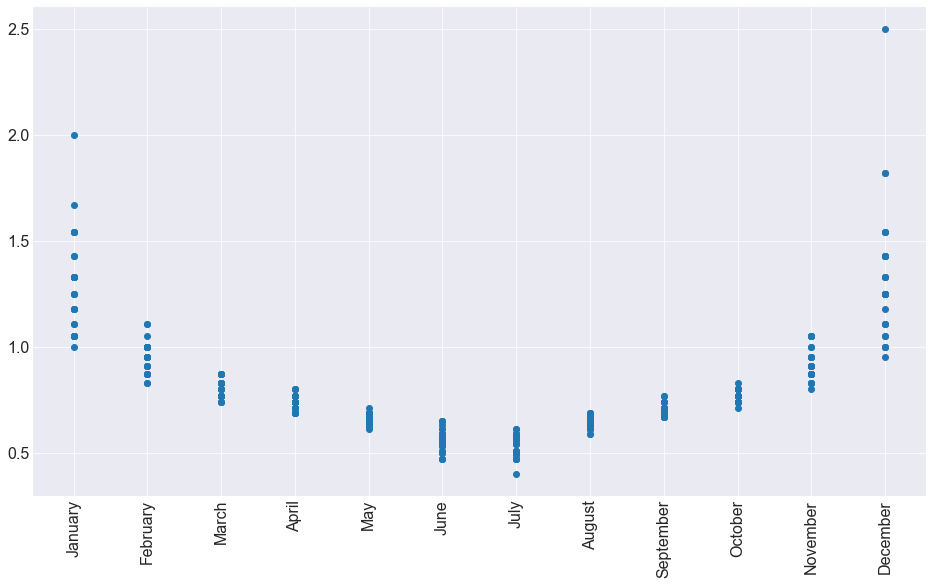

In [10]:

plt.scatter(df.Month, df.Rainfall)
plt.xticks(rotation=90)
plt.show()

Day


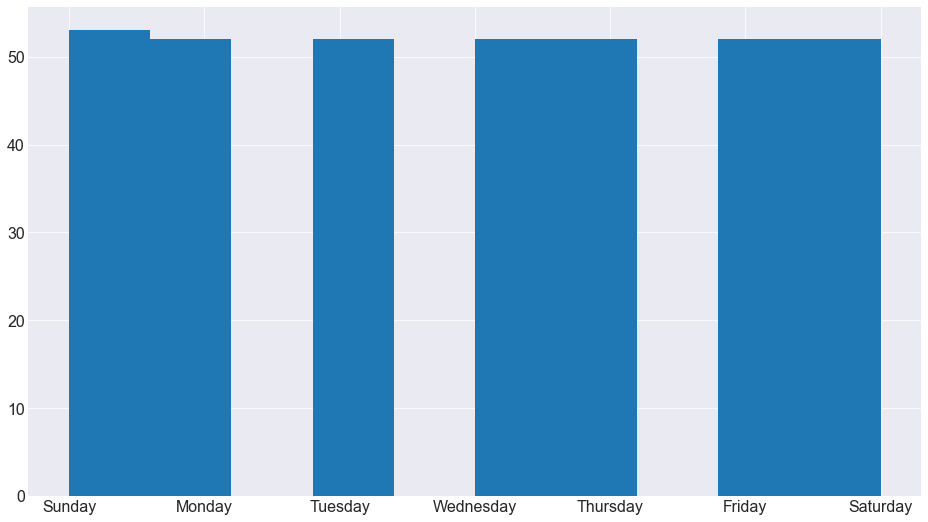

Temperature


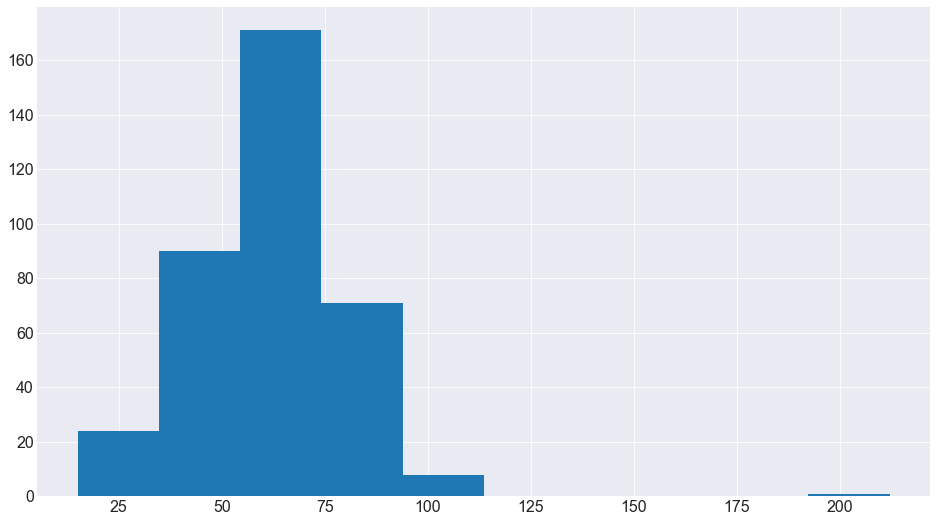

Rainfall


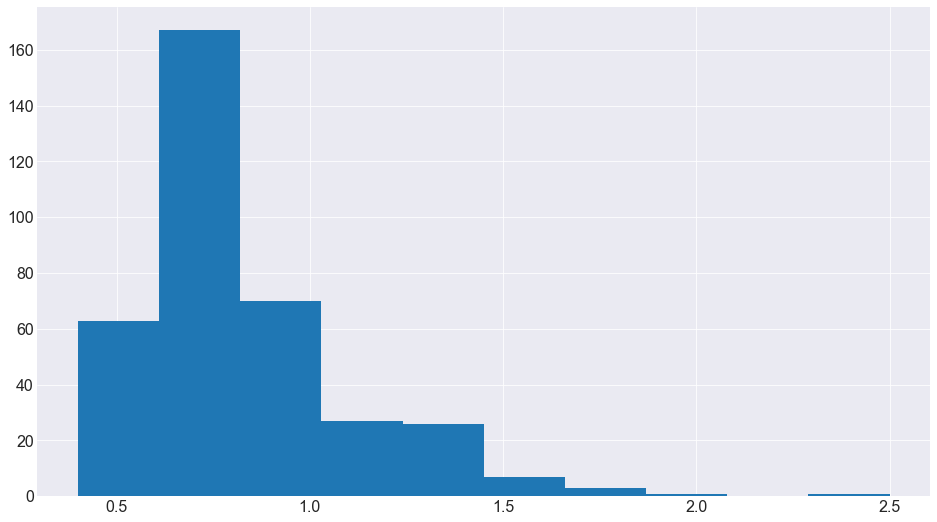

Flyers


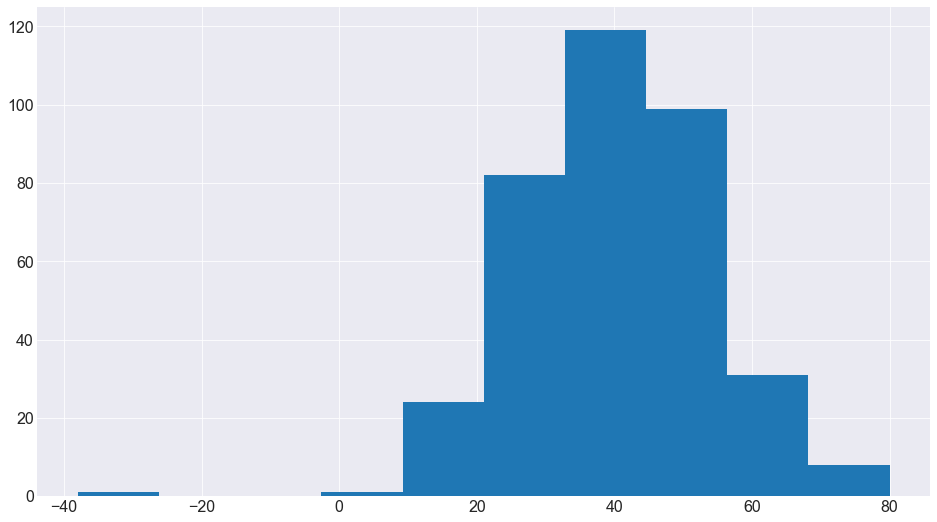

Price


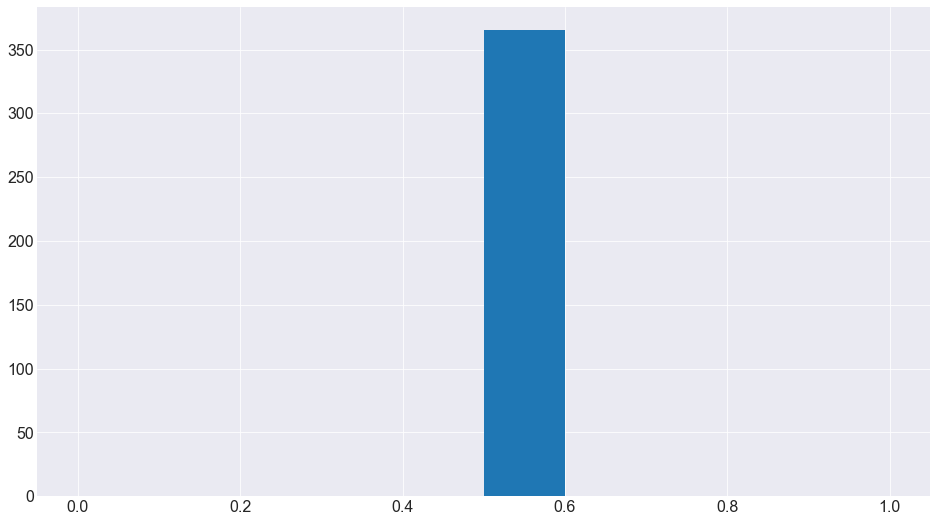

Sales


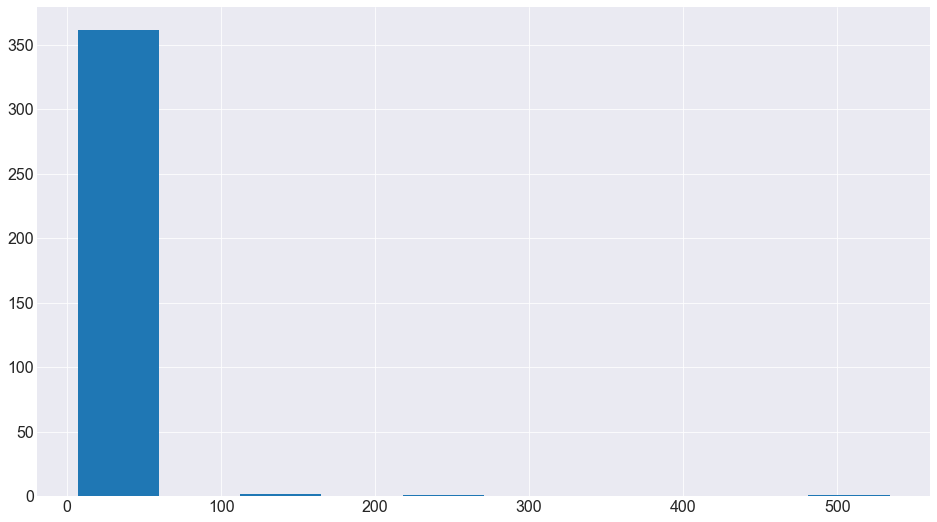

Month


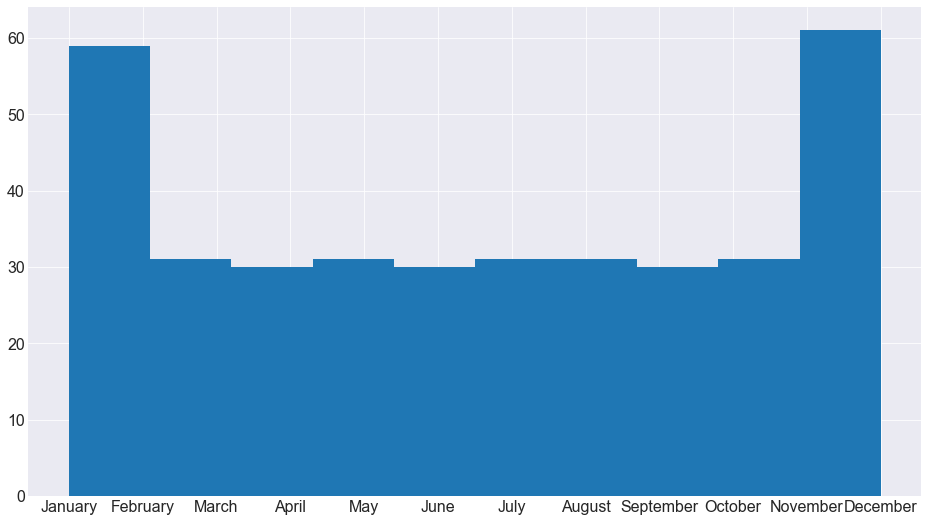

In [11]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()


In [12]:
def get_lower_and_upper_bounds(col, mult=1.5):
    '''
    positional arguments:
    col: a pandas Series
    keyword arguments:
    mult: default 1.5, the magnutude specified for the IQR rule
    
    returns:
    lower_bound, upper_bound: two float values representing the fence values requested
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    upper_bound = q3 + mult * iqr
    return lower_bound,upper_bound

In [13]:
get_lower_and_upper_bounds(df.Rainfall)

(0.26, 1.3)

In [14]:
# at a multiplier of 1.5:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : 16.700000000000003
 Upper bound for Temperature: 104.7

-----------------
 Lower bound for Rainfall : 0.26
 Upper bound for Rainfall: 1.3

-----------------
 Lower bound for Flyers : 4.0
 Upper bound for Flyers: 76.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : 5.0
 Upper bound for Sales: 45.0

-----------------


In [16]:
outliers.keys()


dict_keys(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [18]:
# just for fun
# print out our outliers dataframes using list comprehension
[print('\n~~~~~~~~~~\n', key, ':\n', outliers[key]['df'].to_markdown()) for key in outliers]


~~~~~~~~~~
 Temperature :
 | Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 | February |
| 2017-12-31 00:00:00 | Sunday   |          15.1 |       2.5  |        9 |     0.5 |       7 | December |

~~~~~~~~~~
 Rainfall :
 | Date                | Day       |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:----------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday    |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-01-02 00:00:00 | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 | January  |
| 2017-01-03 00:00:00 | Tuesday   |          34.5 |       1.33 |       27 |     0.5 |      15 |

[None, None, None, None, None]

In [19]:

df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [20]:
# at a multiplier of 3:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], mult=3.0)
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : -16.299999999999997
 Upper bound for Temperature: 137.7

-----------------
 Lower bound for Rainfall : -0.13
 Upper bound for Rainfall: 1.69

-----------------
 Lower bound for Flyers : -23.0
 Upper bound for Flyers: 103.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : -10.0
 Upper bound for Sales: 60.0

-----------------


In [21]:

[print('\n~~~~~~~~~~\n', key, ':\n', outliers[key]['df']) for key in outliers]


~~~~~~~~~~
 Temperature :
                  Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                       
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February

~~~~~~~~~~
 Rainfall :
                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                      
2017-01-01   Sunday         27.0      2.00      15    0.5     10   January
2017-12-05  Tuesday         22.0      1.82      11    0.5     10  December
2017-12-10   Sunday         31.3      1.82      15    0.5     11  December
2017-12-31   Sunday         15.1      2.50       9    0.5      7  December

~~~~~~~~~~
 Flyers :
                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                      
2017-11-21  Tuesday         47.0      0.95     -38    0.5     20  November

~~~~~~~~~~
 Price :


[None, None, None, None, None]

In [23]:
df['z_score_rainfall'] = (df['Rainfall'] - df['Rainfall'].mean()) / df['Rainfall'].std()

In [24]:
df[df.z_score_rainfall.abs() > 3]


,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_rainfall
Date,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,4.286488
2017-01-16,Monday,30.6,1.67,24,0.5,12,January,3.081626
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December,3.629291
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December,3.629291
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December,6.112037


In [25]:
df[df.Flyers < 0] 

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_rainfall
Date,,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November,0.452836


In [26]:

df.loc['2017-11-19':'2017-11-23']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_rainfall
Date,,,,,,,,
2017-11-19,Sunday,55.9,0.87,34,0.5,23,November,0.160748
2017-11-20,Monday,55.6,0.87,41,0.5,22,November,0.160748
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November,0.452836
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,November,0.635391
2017-11-23,Thursday,51.9,0.87,47,0.5,23,November,0.160748


In [27]:
df['Flyers'] = df['Flyers'].abs()

<AxesSubplot:>

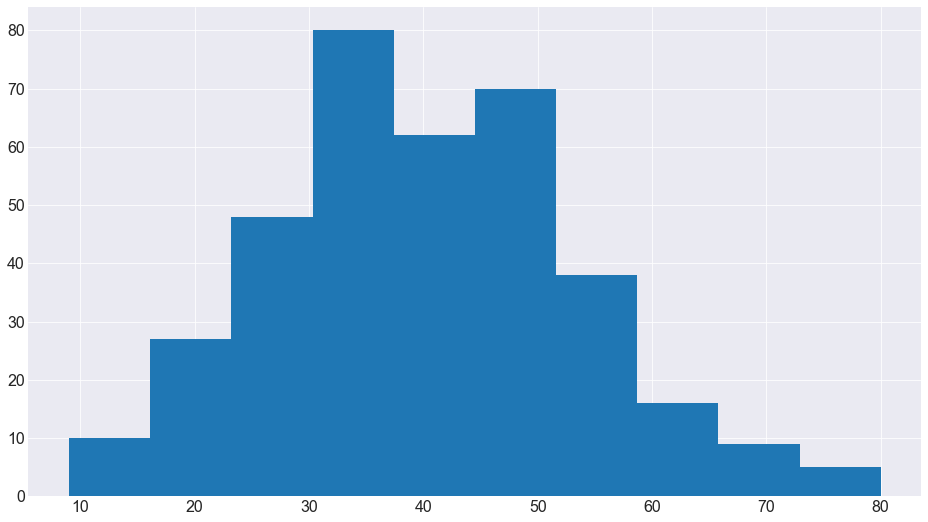

In [28]:
df['Flyers'].hist()


In [29]:
df[df['Temperature'] > 200]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_rainfall
Date,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,0.306792


In [30]:
df.loc['2017-02-11', 'Temperature'] = df.loc['2017-02-10']['Temperature']

In [31]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales,z_score_rainfall
count,365.000000,365.000000,365.000000,365.0,365.000000,3.650000e+02
mean,60.780822,0.825973,40.312329,0.5,27.865753,-2.958972e-15
std,16.272500,0.273890,13.163427,0.0,30.948132,1.000000e+00
min,15.100000,0.400000,9.000000,0.5,7.000000,-1.555267e+00
25%,49.700000,0.650000,31.000000,0.5,20.000000,-6.424931e-01
50%,61.100000,0.740000,39.000000,0.5,25.000000,-3.138943e-01
75%,71.300000,0.910000,49.000000,0.5,30.000000,3.067922e-01
max,102.900000,2.500000,80.000000,0.5,534.000000,6.112037e+00
